### Εγκατάσταση Βιβλιοθηκών

In [ ]:
!pip install numpy wikipedia
!pip install Wikipedia-API
!pip install openai



### Open AI API key

In [ ]:
import openai
openai.api_key =""

### Ανάκτηση περιεχομένου σελίδας Wikipedia ("List of computer scientists") και εξαγωγή των ονομάτων

In [ ]:
import wikipedia as wiki
import pandas as pd

# Retrieve the content of the Wikipedia page
sci = wiki.page("List of computer scientists").content

scientists = []

# Split the scraped data by '==' to get the letter groups
letter_groups = sci.split('==')

for group in letter_groups[1:]:
    # Find all occurrences of '- ' in the group and extract the scientist's name
    names = [line.split('–')[0].strip() for line in group.split('\n') ]
    # Append the names to the scientists list
    scientists.extend(names)

# Create a DataFrame from the list of scientists
df = pd.DataFrame({'Scientist': scientists})
df.head(220)


,Scientist
0,A
1,
2,Atta ur Rehman Khan
3,Wil van der Aalst
4,Scott Aaronson
...,...
215,Daniel P. Friedman
216,Charlotte Froese Fischer
217,Ping Fu
218,Xiaoming Fu


## Καθάρισμα του df από  μηδενικές τιμές

In [ ]:
def clean_name(name):
    if '(' in name:
        return name.split('(')[-2].strip()
    elif '-' in name:
        return name.split('-')[0].strip()
    else:
        return name

In [ ]:
condition = (df['Scientist'].str.len() > 1)
clean_df = df[condition].head(220)
clean_df['Scientist'] = clean_df['Scientist'].apply(clean_name)
clean_df.to_csv("scientists")

##  Word cloud που περιέχει την συχνότητα των ονομάτων βάσει μεγέθους

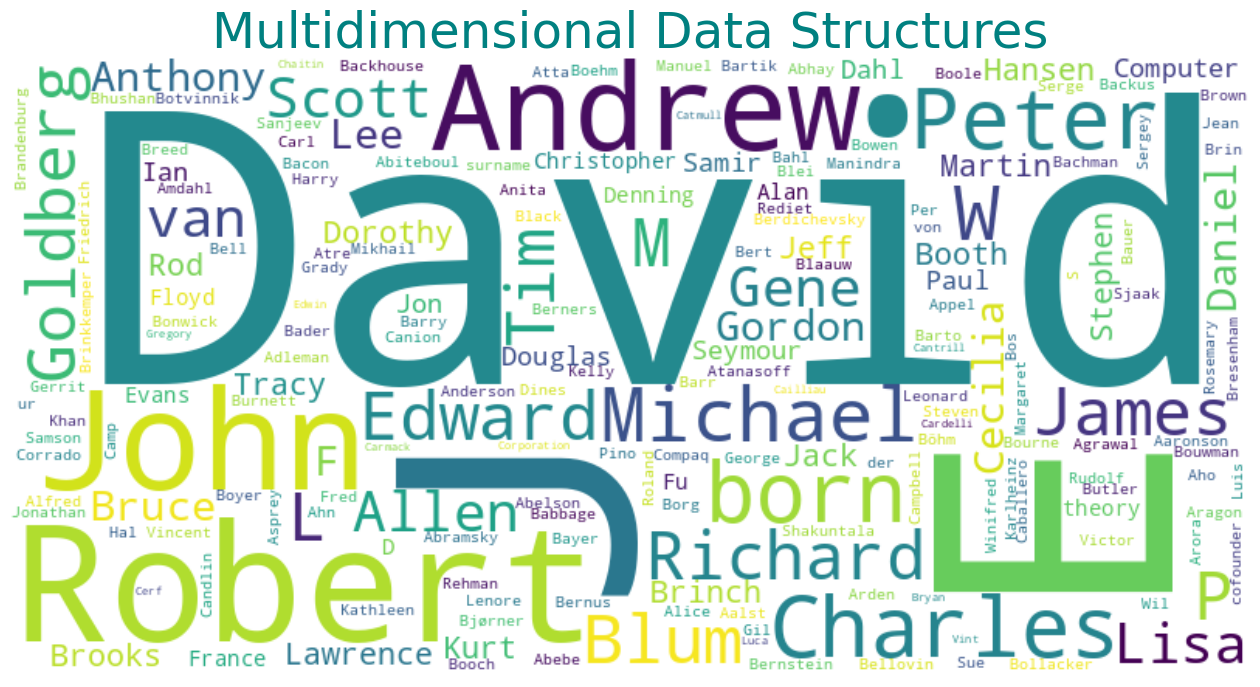

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all the names into a single string
all_names = ' '.join(clean_df['Scientist'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_names)

# Plot the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Multidimensional Data Structures', fontsize=36, color='teal')
plt.show()


# Παραγωγή δεδομένων για το dataset
### Σε αυτή την προσέγγιση χρησιμοποιείται το μοντέλο "text-davinci003" του GPT. Μπορεί να κάνει οποιαδήποτε γλωσσική εργασία με καλύτερη ποιότητα, μεγαλύτερη απόδοση και συνέπεια. Επίσης, υποστηρίζει ορισμένες πρόσθετες λειτουργίες, όπως η εισαγωγή κειμένου. Θα μπορούσαμε να είχαμε χρησιμοποιήσει gpt-3.5-turbo που είναι 10 φορές πιο γρήγορο, αλλά παρατηρήσαμε ότι το text-davinci είναι τόσο καλό όσο το gpt3.5, οπότε μείναμε σε αυτό. Λάβετε υπόψη ότι οι στήλες των βραβείων και της εκπαίδευσης μπορεί να είναι φανταστικές. Ωστόσο, αφού ελέγξαμε διεξοδικά το σύνολο δεδομένων, παρατηρήσαμε ότι οι περισσότερες καταχωρήσεις είναι αρκετά ρεαλιστικές.

# Χρησιμοποιήσαμε 250 καταχωρήσεις  καθώς το api του OpenAI είναι αυστηρό όσον αφορά τις κλήσεις.

In [ ]:
# Create an empty list to store dictionaries
data = []

# Prompting the OpenAI API
for index, row in clean_df.iterrows():
    scientist = row['Scientist']
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f"Find all awards by computer scientist: {scientist}",
        max_tokens=4000
    )
    awards = response['choices'][0]['text']
    education_response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f"Find education details of the computer scientist: {scientist}",
        max_tokens=4000
    )
    education = education_response['choices'][0]['text']

    # Append the scientist, their awards, and education as a dictionary to the list
    data.append({"Scientist": scientist, "Awards": awards, "Education": education})

# Convert the list of dictionaries to a DataFrame
df2 = pd.DataFrame(data)
df2.to_csv('dataset.csv', index=False)


## Καταμέτρηση των Βραβείων και αποθήκευση csv

In [ ]:
df2 = pd.read_csv('dataset.csv')
df2["Awards"] = df2["Awards"].apply(lambda x: x.count(".") if "." in x else x.count("-"))

# Convert the "Awards" column to integer type
df2["Awards"] = df2["Awards"].astype(int)
df2.to_csv('dataset2.csv', index=False)


### Συνολικά ο κώδικας ξεκινά με την εγκατάσταση των απαιτούμενων πακέτων Python: numpy, wikipedia, Wikipedia-API και openai.
### Εισάγει τις απαραίτητες ενότητες: openai για χρήση του μοντέλου γλώσσας GPT-3 του OpenAI, wikipedia για ανάκτηση περιεχομένου της Wikipedia και panda για χειρισμό δεδομένων.
### Ανακτά το περιεχόμενο της σελίδας της Wikipedia με τίτλο "List of computer scientists" χρησιμοποιώντας τη βιβλιοθήκη wikipedia και το αποθηκεύει στη μεταβλητή sci.
### Το περιεχόμενο της σελίδας χωρίζεται σε διαφορετικές ενότητες χρησιμοποιώντας τον οριοθέτη '==' και τα ονόματα των επιστημόνων υπολογιστών εξάγονται από κάθε ενότητα.
### Το DataFrame καθαρίζεται αφαιρώντας NaN ή κενές σειρές από τη στήλη 'Scientist'. Η συνάρτηση clean_name χρησιμοποιείται για τον καθαρισμό των ονομάτων αφαιρώντας επιπλέον χαρακτήρες όπως παρενθέσεις ή παύλες.

### Στη συνέχεια, το χρησιμοποιεί το LLM GPT-3 του OpenAI για τη δημιουργία πρόσθετων δεδομένων για τους επιστήμονες υπολογιστών. Δημιουργεί μια λίστα με λεξικά, όπου κάθε λεξικό περιέχει το όνομα του επιστήμονα, τα βραβεία του και τα στοιχεία εκπαίδευσής του.
### Τα δεδομένα που δημιουργούνται στη συνέχεια μετατρέπονται σε DataFrame df2 και ο αριθμός των βραβείων για κάθε επιστήμονα μετράται και αποθηκεύεται στη στήλη "Βραβεία".
### Τέλος, το DataFrame df2 αποθηκεύεται σε ένα αρχείο CSV με το όνομα 'dataset2.csv'.